<a href="https://colab.research.google.com/github/lkarjun/FarmHealthily/blob/master/plant_leaf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image downloading

In [1]:
from google.colab import files

In [ ]:
upload = files.upload()

In [2]:
!unzip /content/drive/MyDrive/dataset/new-plant-diseases-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

In [3]:
!rm -rf '/content/new plant diseases dataset(augmented)'

# Packages

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras import layers
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
import PIL
from tensorflow.keras.optimizers import RMSprop

# Processing

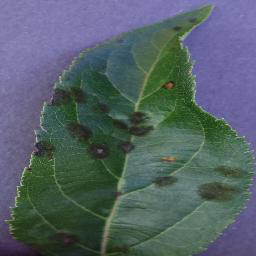

In [6]:
img = load_img('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003.JPG')
img

In [12]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.1,
    horizontal_flip = True,
)

valid_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
train_generator = train_datagen.flow_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    target_size = (256, 256),
    batch_size = 500,
    class_mode = 'categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    target_size = (256, 256),
    batch_size = 500,
    class_mode = 'categorical'
)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [9]:
img = PIL.Image.open('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003.JPG')
np.asarray(img).shape

(256, 256, 3)

# Model

In [ ]:
model = keras.models.Sequential([
      layers.Conv2D(16, 3, activation='relu', input_shape = (256, 256, 3)),
      layers.MaxPooling2D(3),

      layers.Conv2D(32, 3, activation='relu'),
      layers.MaxPooling2D(2),

      layers.Conv2D(64, 3, activation='relu'),
      layers.MaxPooling2D(2),

      layers.Conv2D(128, 3, activation='relu'),
      layers.MaxPooling2D(2),

      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dropout(0.3),

      layers.Dense(512, activation='relu'),
      layers.Dropout(0.3),

      layers.Dense(512, activation='relu'),
      layers.Dropout(0.5),


      layers.Dense(1024, activation='relu'),
      layers.Dropout(0.6),


      layers.Dense(1024, activation='relu'),
      layers.Dropout(0.5),

      layers.Dense(512, activation='relu'),

      layers.Dense(512, activation='relu'),

      layers.Dense(128, activation='relu'),
      layers.Dropout(0.5),

      layers.Dense(38, activation = 'softmax')
])

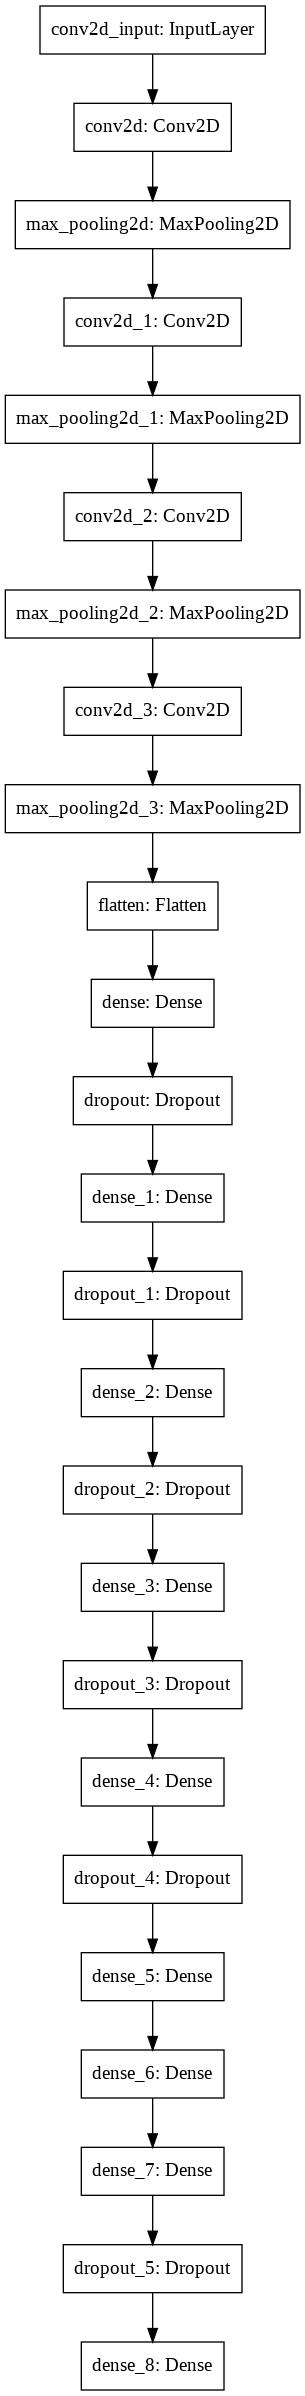

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 84, 84, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 82, 82, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 39, 39, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 17, 17, 128)       7

In [ ]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['acc'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):

  def on_epoch_end(self, epoch, logs={}):
    if logs.get('acc') > 0.95:
      print(f"-------Train acc 90% and Valid acc 90%-------")
      self.model.stop_training = True
    

callbacks = myCallback()

In [ ]:
history = model.fit(train_generator, batch_size = 500, steps_per_epoch=100, epochs=600)

In [ ]:
!rm -rf test

# Pretrained Model

In [20]:
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [23]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2021-03-23 05:06:33--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   210MB/s    in 0.4s    

2021-03-23 05:06:34 (210 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [26]:
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (256, 256, 3),
                                include_top = False,
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

In [27]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
pre_trained_model.summary()

In [30]:
last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output

In [31]:
from tensorflow.keras.optimizers import RMSprop

In [32]:
x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='swish')(x)
x = layers.Dense(512, activation='swish')(x)
x = layers.Dense(38, activation='softmax')(x)

In [39]:
model = Model(pre_trained_model.input, x)
model.compile(optimizer = RMSprop(lr=0.001),
              loss = 'categorical_crossentropy',
              metrics = ['acc', 'Recall', 'Precision'])

In [42]:
class myCallback(tf.keras.callbacks.Callback):

  def on_epoch_end(self, epoch, logs={}):
    if logs.get('acc') > 0.95:
      print(f"-------Train acc 90% and Valid acc 90%-------")
      self.model.stop_training = True
    

callbacks = myCallback()

model.fit(train_generator, batch_size=400, epochs=500, validation_data=valid_generator, steps_per_epoch=50, callbacks=[callbacks])

Epoch 1/500
50/50 [==============================] - 435s 9s/step - loss: 1.8513 - acc: 0.5442 - recall: 0.4389 - precision: 0.6994 - val_loss: 1.4378 - val_acc: 0.6316 - val_recall: 0.5644 - val_precision: 0.7325
Epoch 2/500
50/50 [==============================] - 421s 8s/step - loss: 0.9824 - acc: 0.7122 - recall: 0.6496 - precision: 0.8095 - val_loss: 1.3198 - val_acc: 0.6852 - val_recall: 0.6511 - val_precision: 0.7527
Epoch 3/500
50/50 [==============================] - 422s 8s/step - loss: 0.7632 - acc: 0.7860 - recall: 0.7491 - precision: 0.8415 - val_loss: 0.7347 - val_acc: 0.7822 - val_recall: 0.7527 - val_precision: 0.8259
Epoch 4/500
50/50 [==============================] - 418s 8s/step - loss: 0.5699 - acc: 0.8294 - recall: 0.8023 - precision: 0.8714 - val_loss: 0.3669 - val_acc: 0.8867 - val_recall: 0.8672 - val_precision: 0.9095
Epoch 5/500
50/50 [==============================] - 409s 8s/step - loss: 0.4274 - acc: 0.8677 - recall: 0.8458 - precision: 0.8984 - val_loss: 

In [43]:
model.save("plant-leaf.h5")